# Numerov algorithm for the Schroedinger equation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import hbar
import math


plt.style.use('seaborn-poster')
%matplotlib inline

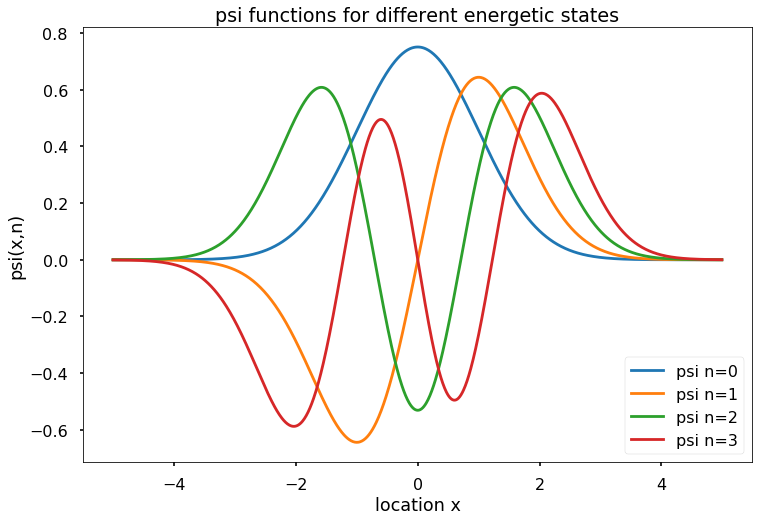

In [55]:
#ANALYTICAL SOLUTIONS

#compute hermite polynomials

#H_0(x)=1
#H1_(x)=2*x
#higher polynomials : H_n(x)= 2*x*H_n(x)-2*n*H    

def hermite(x,n):
    if n==0:
        return 1
    elif n==1:
        return 2*x
    else:
        return 2*x*hermite(x,n-1)-2*(n-1)*hermite(x,n-2)
    
# Analytical psi functions psi(location x, energetic state n)
def ana_psi(x,n):
    return (hermite(x,n)/(np.sqrt((2**n)*math.factorial(n)*np.sqrt(np.pi)))*np.exp(-x**2/2.))

#initial parameters

#argument grid
h = 0.01 # Step size
x0 = -5 # Initial argument
xf = 5 # final argument
x = np.arange(x0, xf , h, dtype="float64")# Argument grid


#Plot analytical function
plt.figure(figsize = (12,8))
for n in range(0,4):    
    plt.plot(x,ana_psi(x,n), label = 'psi n='+str(n))
    plt.title('psi functions for different energetic states')
    plt.xlabel('location x')
    plt.ylabel('psi(x,n)')
    plt.grid()
    plt.legend(loc='lower right')

plt.show()

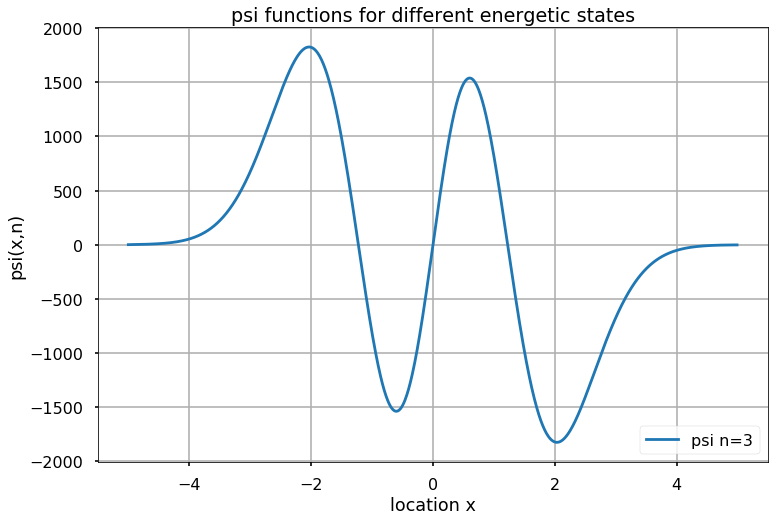

In [56]:
#NUMEROV METHOD

def num(km,kp,kn,h,psim,psin):
    #Definition of arguments:
    #km=k_(n-1), kn=k_n, kp=k_(n+1)
    #psim = psi_(n-1), psip = psi_(n+1) psin=psi_n
    m = 2*(1-(5./12.)*(h**2)*kn)*psin #term of y_n
    n = (1+(1./12.)*(h**2)*km)*psim #term of y_(n-1)
    o = (1+(1./12.)*(h**2)*kp) #factor in front of y_(n+1)
    return (m-n)/o #returns psi_n+1(x)

def k(x,n):
    return 2*(n+0.5)-x**2

#parameters
n=3 #INSERT ENERGETIC STATE
a=0.1

#initialise arrays
psi=np.ones(len(x))
k=np.ones(len(x))*k(x,n)

#initial values
if (n % 2) == 0:
    #initial values for symmetric solutions
    psi[0]=a #setting psi(x -> -infinity)= a
    psi[1]=psi[0]-((h**2)*k[0]*psi[0])/2. #setting to a non-zero constant
else:
   #initial values for asymmetric solutions
    psi[0]=0
    psi[1]=a

#Numerov iteration
for i in np.arange(1,len(psi)-1):
    psi[i+1]= num(k[i-1],k[i+1],k[i],h,psi[i-1],psi[i])
    
#plot psi
plt.figure(figsize = (12,8))  
plt.plot(x,psi, label = 'psi n='+str(n))
plt.title('psi functions for different energetic states')
plt.xlabel('location x')
plt.ylabel('psi(x,n)')
plt.grid()
plt.legend(loc='lower right')

# 2.Neutron in gravitational field

Choice of length and energy units:

$x=\frac{z}{R}$ and $\epsilon=\frac{E}{mgR}$
where $R=(\frac{\hbar^2}{2m^2g})^\frac{1}{3}$

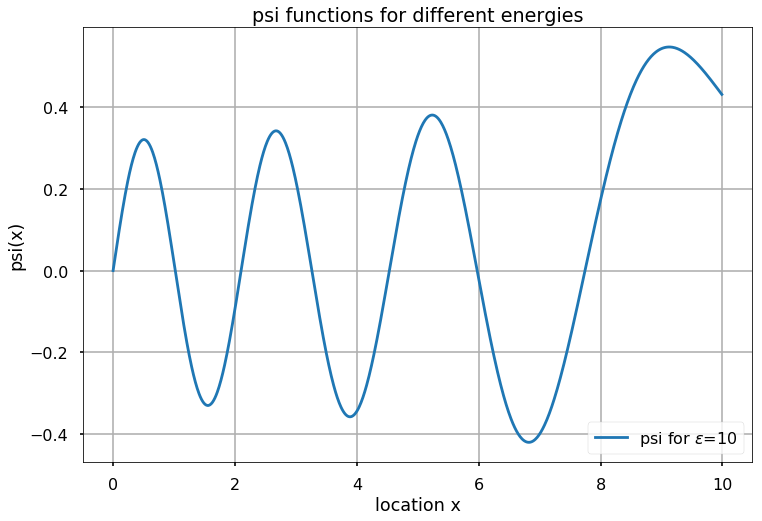

In [84]:
#argument grid
h = 0.01 # Step size
x0 = 0 # Initial argument
xf = 10 # final argument
x = np.arange(x0, xf , h, dtype="float64")# Argument grid

#E=1.44*10**(-12)/(1.67*10**(-27)*9.81*10**7) #Energy value
E=10

#NUMEROV METHOD

def num(km,kp,kn,h,psim,psin):
    #Definition of arguments:
    #km=k_(n-1), kn=k_n, kp=k_(n+1)
    #psim = psi_(n-1), psip = psi_(n+1) psin=psi_n
    m = 2*(1-(5./12.)*(h**2)*kn)*psin #term of y_n
    n = (1+(1./12.)*(h**2)*km)*psim #term of y_(n-1)
    o = (1+(1./12.)*(h**2)*kp) #factor in front of y_(n+1)
    return (m-n)/o #returns psi_n+1(x)

def k(x,n):
    return E-x


#initialise arrays
psi=np.ones(len(x))
k=np.ones(len(x))*k(x,n)

#initial values
psi[0]=0 #setting psi(x -> -infinity)= 0
psi[1]= h #setting to a non-zero constant due to homogenity of the schroedinger equation


#Numerov iteration
for i in np.arange(1,len(psi)-1):
    psi[i+1]= num(k[i-1],k[i+1],k[i],h,psi[i-1],psi[i])
    
#plot psi
plt.figure(figsize = (12,8))  
plt.plot(x,psi, label = 'psi for $\epsilon$='+str(E))
plt.title('psi functions for different energies')
plt.xlabel('location x')
plt.ylabel('psi(x)')
plt.grid()
plt.legend(loc='lower right')